<a href="https://colab.research.google.com/github/unknown-jun/NLP_study/blob/main/NLP_Book/B02_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 활성화 함수
- 전달함수에서 전달받은 값을 출력할 때 일정기준에 따라 출력값을 변화시키는 비선형 함수

## 손실 함수
- 학습을 통해 얻은 데이터의 추정치가 실제 데이터와 얼마나 차이가 나는지 평가하는 지표
- 분류문제에서 시그모이드 함수가 포함된 자연상수 $e$때문에 평균 제곱 오차를 적용하면 매끄럽지 못한 그래프(울퉁불퉁한 그래프)가 출력됨
- 따라서 크로스 엔트로피 손실 함수를 사용하는데, 이 손실 함수를 적용할 경우 경사 하강법 과정에서 학습이 지역 최소점에서 멈출 수 있다.
- 이를 방지하고자 자연상수 $e$에 반대되는 자연 로그를 모델의 출력값에 취함

In [ ]:
import torch
import numpy as np

In [ ]:
# 평균 제곱 오차
loss_fn = torch.nn.MSELoss(reduction='sum')
y_pred= model(x)
loss = loss_fn(y_pred, y)

# 크로스 엔트로피 오차
loss = torch.nn.CrossEntropyLoss()
input = torch.randn(5, 6, requires_grad=True)
target = torch.empty(5, dtype=torch.long).random_(5)
output= loss(input, target)
output.backward()

## 드롭아웃
신경망 모델이 과적합되는 것을 피하기 위한 방법으로, 학습 과정 중 임의로 일부 노드들을 학습에서 제외시키는 것

In [ ]:
import torch.nn.functional as F

class DropoutModel(torch.nn.Module):
  def __init__(self):
    super(DropoutModel, self).__init__()
    self.layer1 = torch.nn.Linear(784, 1200)
    self.dropout1 = torch.nn.Dropout(0.5)  # 50%의 노드를 무작위로 선택하여 사용하지 않겠다는 의미
    self.layer2 = torch.nn.Linear(1200, 1200)
    self.dropout2 = torch.nn.Dropout(0.5)
    self.layer3 = torch.nn.Linear(1200, 10)
  
  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = self.dropout1(x)
    x = F.relu(self.layer2(x))
    x = self.dropout2(x)
    return self.layer3(x)

In [ ]:
from torch.utils.data import Dataset, DataLoader

# 미니 배치 경사 하강법
class CustomeDataset(Dataset):
  def __init__(self):
    self.x_data = [[1,2,3], [4,5,6], [7,8,9]]
    self.y_data = [[12], [18], [11]]

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

dataset = CustomeDataset()
dataloader = DataLoader(
    dataset,
    batch_size=2,
    shuffle=True
)

# 합성곱 신경망


In [ ]:
# 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms  # 데이터 전처리를 위해 사용하는 라이브러리

In [ ]:
# CPU 혹은 GPU 장치 확인
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# fashion_mnist 데이터셋 내려받기
train_dataset = torchvision.datasets.FashionMNIST('./',download=True,
                                                  transform= transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST('./', download=True, train=False,
                                                 transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [ ]:
# # fashion_mnist 데이터를 데이터로더에 전달
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)

**`torch.utils.data.DataLoader()`**  
`torch.utils.data.DataLoader()`를 사용하여 원하는 크기의 배치 단위로 데이터를 불러오거나, 순서가 무작위로 섞이도록(shuffle)할 수 있다.  
현재 batch_size=100으로 지정했기 때문에 100개 단위로 데이터를 묶어서 불러온다.

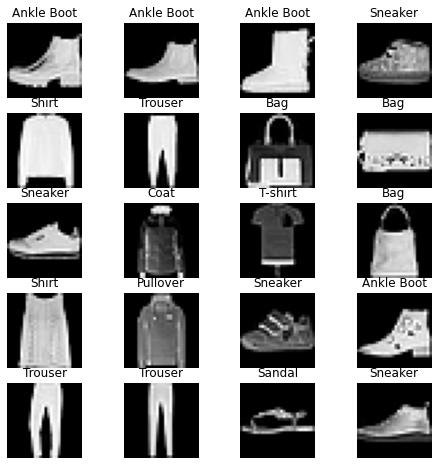

In [ ]:
# 분류에서 사용될 클래스 정의
labels_map = {0:'T-shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 
              4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker',
              8:'Bag', 9:'Ankle Boot'}

fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
  img_xy = np.random.randint(len(train_dataset))
  img = train_dataset[img_xy][0][0,:,:]   # train_dataset이 tuple로 묶여 있어서 [0], gray scale 이기 때문에 [0,:,:]
  fig.add_subplot(rows, columns, i)
  plt.title(labels_map[train_dataset[img_xy][1]])
  plt.axis('off')
  plt.imshow(img, cmap='gray');

In [ ]:
# ConvNet이 적용되지 않은 심층 신경망 모델 생성
class FashionDNN(nn.Module):
  def __init__(self):
    super(FashionDNN, self).__init__()
    self.fc1 = nn.Linear(in_features=784, out_features=256)
    self.drop = nn.Dropout(0.25)
    self.fc2 = nn.Linear(in_features=256, out_features=128)
    self.fc3 = nn.Linear(in_features=128, out_features=10)

  def forward(self, input_data):
    out = input_data.view(-1, 784)
    out = F.relu(self.fc1(out))
    out = self.drop(out)
    out = F.relu(self.fc2(out))
    return out

**nn.xx와 nn.functional.xx와의 차이**  
nn.Conv2d에서는 input_channel과 output_channel을 사용해서 연산했다면 functional.conv2d는 입력(input)과 가중치(weight) 자체를 직접 넣어줌  
이때 직접 넣어준다는 의미는 가중치를 전달해야 할 때마다 가중치 값을 새로 정의해야 함을 의미

In [ ]:
import torch
import torch.nn as nn

inputs = torch.randn(64, 3, 244, 244)
conv = nn.Conv2d(in_channels = 3, out_channels=64, kernel_size=3, padding=1)
outputs = conv(inputs)
layer = nn.Conv2d(1,1,3)

In [ ]:
import torch.nn.functional as F

inputs = torch.randn(64, 3, 244, 244)
weight = torch.randn(64, 3, 3, 3)
bias = torch.randn(64)
outputs = F.conv2d(inputs, weight, bias, padding=1)

In [ ]:
# 심층 신경망에서 필요한 파라미터 정의
learning_rate = 0.001
model = FashionDNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# 심층 신경망을 이용한 모델 학습
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []


for epoch in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100, 1, 28, 28))
    labels = Variable(labels)

    outputs = model(train)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    count += 1

    if not (count % 50):
      total = 0
      correct = 0
      for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        labels_list.append(labels)
        test = Variable(images.view(100,1,28,28))
        outputs = model(test)
        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)
        correct += (predictions == labels).sum()
        total += len(labels)

      accuracy = correct * 100 / total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)
    
    if not (count % 500):
      print('Iteration: {}, Loss: {}, Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500, Loss: 1.1217314004898071, Accuracy: 76.5999984741211%
Iteration: 1000, Loss: 1.183708667755127, Accuracy: 76.6500015258789%
Iteration: 1500, Loss: 0.3091970682144165, Accuracy: 85.68999481201172%
Iteration: 2000, Loss: 0.40196511149406433, Accuracy: 85.83999633789062%
Iteration: 2500, Loss: 0.2625661790370941, Accuracy: 86.77999877929688%
Iteration: 3000, Loss: 0.27382269501686096, Accuracy: 86.3699951171875%


In [ ]:
# 합성곱 네트워크 생성
class FashionCNN(nn.Module):
  def __init__(self):
    super(FashionCNN, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.fc1 = nn.Linear(in_features= 64*6*6, out_features=600)
    self.drop = nn.Dropout2d(0.25)
    self.fc2 = nn.Linear(in_features= 600, out_features=120)
    self.fc3 = nn.Linear(in_features=120, out_features=10)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    out = self.drop(out)
    out = self.fc2(out)
    out = self.fc3(out)
    return out

In [ ]:
# 합성곱 네트워크를 위한 파라미터 정의
learning_rate = 0.001
model = FashionCNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [ ]:
# 모델 학습 및 성능 평가
num_epochs = 5
count = 0
loss_list = []
iteraion_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epochs in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100,1,28,28))
    labels = Variable(labels)

    outputs = model(train)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    count+=1

    if not (count % 50):
      total = 0
      correct = 0
      for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        labels_list.append(labels)
        test = Variable(images.view(100,1,28,28))
        outputs = model(test)
        predictions = torch.max(outputs,1)[1].to(device)
        predictions_list.append(predictions)
        correct += (predictions == labels).sum()
        total += len(labels)

      accuracy = correct * 100 / total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)
    
    if not (count % 500):
      print('Iteration: {}, Loss: {}, Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.3928165137767792, Accuracy: 87.05999755859375%
Iteration: 1000, Loss: 0.3472907245159149, Accuracy: 87.69999694824219%
Iteration: 1500, Loss: 0.3117033541202545, Accuracy: 87.7699966430664%
Iteration: 2000, Loss: 0.20910732448101044, Accuracy: 88.88999938964844%
Iteration: 2500, Loss: 0.11644086241722107, Accuracy: 89.69999694824219%
Iteration: 3000, Loss: 0.1852099448442459, Accuracy: 90.23999786376953%


## 전이 학습

In [ ]:
# 라이브러리 호출
import os
import time
import copy
import glob
import cv2
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# 이미지 데이터 전처리 방법 정의
data_path = '/content/drive/MyDrive/딥러닝 파이토치 교과서/train'

transform = transforms.Compose(
    [
     transforms.Resize([256, 256]),     # 이미지의 크기를 조정. 즉, 256 x 256 크기로 이미지 데이터를 조정
     transforms.RandomResizedCrop(224), # 이미지를 랜덤한 크기 및 비율로 자름
     transforms.RandomHorizontalFlip(), # 이미지를 랜덤하게 수평으로 뒤집음
     transforms.ToTensor()
    ])

train_dataset = torchvision.datasets.ImageFolder(
    # 데이터로더가 데이터를 불러올 대상(혹은 경로)과 방법(transform)을 정의한다.
    data_path,
    transform=transform
)
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    num_workers=4,  # 데이터를 불러올 때 하위 프로세스를 몇개 사용할지 설정하는데, 
                    # 너무 많은 하위 프로세스를 설정하면 오류가 발생하거나 메모리 부족현상이 발생할 수 있다.
    shuffle=True
)

print(len(train_dataset))

385


**RandomResizedCrop**

In [ ]:
!pip install mxnet
!pip install --user mxnet

     |████████████████████████████████| 47.3 MB 122 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


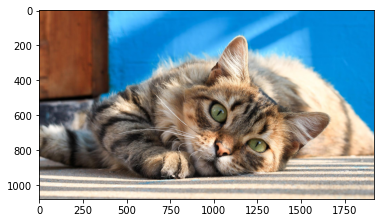

In [ ]:
import mxnet as mx
from mxnet.gluon.data.vision import transforms

example_image = mx.image.imread('/content/drive/MyDrive/딥러닝 파이토치 교과서/cat.jpg')
plt.imshow(example_image.asnumpy());

In [ ]:
# 불러온 이미지에 RandomResizedCrop을 적용하기 위한 함수 생성
def show_images(imgs, num_rows, num_cols, scale=2):
  aspect_ratio = imgs[0].shape[0]/imgs[0].shape[1] # 확장할 이미지의 크기 조정
  figsize = (num_cols * scale, num_rows * scale * aspect_ratio)
  _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
  for i in range(num_rows):
    for j in range(num_cols):
      axes[i][j].imshow(imgs[i * num_cols + j].asnumpy())
      axes[i][j].axes.get_xaxis().set_visible(False)
      axes[i][j].axes.get_yaxis().set_visible(False)
  plt.subplots_adjust(hspace=0.1, wspace=0)
  return axes

def apply(img, aug, num_rows=2, num_cols=4, scale=3):
  Y = [aug(img) for _ in range(num_rows * num_cols)]
  show_images(Y, num_rows, num_cols, scale)

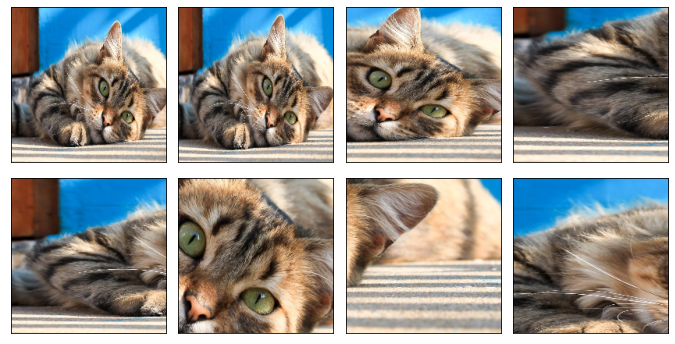

In [ ]:
# RandomResizedCrop이 적용된 이미지를 출력
shape_aug = transforms.RandomResizedCrop(size=(200,200), # 출력할 크기를 200x200으로 조정
                                         scale=(0.1, 1), # 면적 비율을 0.1~1(10~100%) 범위 내에서 무작위로 자름
                                         ratio=(0.5, 2)) # 면적의 너비와 높이 비율을 0.5~2 범위 내에서 무작위로 조절함
apply(example_image, shape_aug)

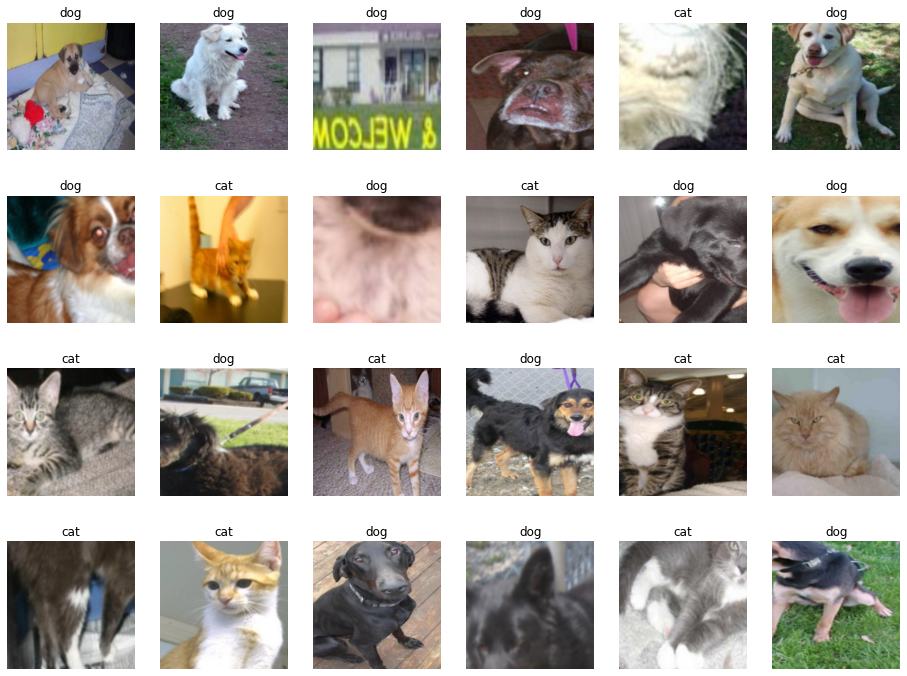

In [ ]:
# 학습에 사용될 이미지 출력
samples, labels = iter(train_loader).next()
classes = {0:'cat', 1:'dog'}

fig = plt.figure(figsize=(16, 24))
for i in range(24):
  a = fig.add_subplot(4,6,i+1)
  a.set_title(classes[labels[i].item()])
  a.axis('off')
  a.imshow(np.transpose(samples[i].numpy(), (1,2,0)))   # samples의 shape를 (3, 224, 224)에서 (224, 224, 3)으로 변환

plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

In [ ]:
# 사전 훈련된 모델 내려받기
resnet18 = models.resnet18(pretrained=True)

In [ ]:
# ResNet18의 합성곱층을 사용하되 파라미터에 대해서는 학습을 하지 않도록 고정
# 사전 훈련된 모델의 파라미터 학습 유무 지정
def set_parameter_requires_grad(model, feature_extracting=True):
  if feature_extracting:
    for param in model.parameters():
      param.requires_grad = False

set_parameter_requires_grad(resnet18)

In [ ]:
# ResNet18에 완전연결층을 추가
resnet18.fc = nn.Linear(512, 2) # 2는 클래스가 두개라는 의미

# 모델의 파라미터 값 확인
for name, param in resnet18.named_parameters():
  if param.requires_grad:
    print(name, param.data)

fc.weight tensor([[-0.0224,  0.0326,  0.0256,  ...,  0.0088, -0.0094,  0.0190],
        [-0.0041, -0.0248,  0.0268,  ..., -0.0214,  0.0053, -0.0135]])
fc.bias tensor([ 0.0143, -0.0395])


In [ ]:
# 모델 객체 생성 및 손실 함수 정의
model = models.resnet18(pretrained=True)  # 모델 객체 생성

for param in model.parameters():          # 모델의 합성곱층 가중치 고정
  param.requires_grad = False

model.fc = torch.nn.Linear(512, 2)
for param in model.fc.parameters():       # 완전연결층은 학습
  param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# 모델 학습을 위한 함수 생성
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):
  since = time.time()
  acc_history = []
  loss_history = []
  best_acc = 0.0

  for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs-1))
    print('-' * 10)

    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in dataloaders:  # dataloaders에 전달된 데이터 만큼 반복
      inputs = inputs.to(device)
      labels = labels.to(device)

      model.to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      _, preds = torch.max(outputs, 1)
      loss.backward()
      optimizer.step()

      running_loss += loss.item() * inputs.size(0)  # 출력 결과와 레이블의 오차를 계산한 결과를 누적하여 저장
      running_corrects += torch.sum(preds == labels.data)  # 출력 결과와 레이블이 동일한지 확인한 결과를 누적하여 저장

    epoch_loss = running_loss / len(dataloaders.dataset)   # 평균 오차 계산
    epoch_acc = running_corrects.double() / len(dataloaders.dataset) # 평균 정확도 계산

    print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

    if epoch_acc > best_acc:
      best_acc = epoch_acc

    acc_history.append(epoch_acc.item())
    loss_history.append(epoch_loss)
    torch.save(model.state_dict(), os.path.join('/content/sample_data/', '{0:0=2d}.pth'.format(epoch))) # 모델 재사용을 위해 저장해둠
    # model.state_dict() 모델이 그동안 학습했던 가중치와 편향값들이 저장되어 있는 객체
    print()

  time_elapsed = time.time()
  print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed//60, time_elapsed % 60))
  print('Best Acc: {:.4f}'.format(best_acc))
  return acc_history, loss_history

In [ ]:
# 파라미터 학습 결과를 옵티마이저에 전달 
params_to_update = []
for name, param in resnet18.named_parameters():
  if param.requires_grad == True:
    params_to_update.append(param)  # 파라미터 학습 결과를 저장
    print('\t', name)

optimizer = optim.Adam(params_to_update) # 학습 결과를 옵티마이저에 전달

	 fc.weight
	 fc.bias


In [ ]:
# 모델 학습
criterion = nn.CrossEntropyLoss()
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/12
----------
Loss: 0.6001 Acc: 0.6779

Epoch 1/12
----------
Loss: 0.3984 Acc: 0.8312

Epoch 2/12
----------
Loss: 0.3381 Acc: 0.8545

Epoch 3/12
----------
Loss: 0.4159 Acc: 0.7922

Epoch 4/12
----------
Loss: 0.2576 Acc: 0.8935

Epoch 5/12
----------
Loss: 0.2254 Acc: 0.9273

Epoch 6/12
----------
Loss: 0.2234 Acc: 0.9299

Epoch 7/12
----------
Loss: 0.2516 Acc: 0.8909

Epoch 8/12
----------
Loss: 0.1924 Acc: 0.9325

Epoch 9/12
----------
Loss: 0.2130 Acc: 0.9169

Epoch 10/12
----------
Loss: 0.1961 Acc: 0.9169

Epoch 11/12
----------
Loss: 0.1999 Acc: 0.9169

Epoch 12/12
----------
Loss: 0.2284 Acc: 0.8987

Training complete in 27505040m 38s
Best Acc: 0.9325


In [ ]:
# 테스트 데이터 호출 및 전처리
test_path = '/content/drive/MyDrive/딥러닝 파이토치 교과서/test'

transform = transforms.Compose(
    [
     transforms.Resize(224),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
    ])
test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    num_workers=1,
    shuffle=True
)

print(len(test_dataset))

98


In [ ]:
# 테스트 데이터 평가 함수 생성
def eval_model(model, dataloaders, device):
  since = time.time()
  acc_history = []
  best_acc = 0.0

  save_models = glob.glob('/content/sample_data/'+'*.pth')
  save_models.sort()
  print('saved_model', save_models)

  for model_path in save_models:
    print('Loading model', model_path)

    model.load_state_dict(torch.load(model_path))
    model.eval()
    model.to(device)
    running_corrects = 0

    for inputs, labels in dataloaders:   # 테스트 반복
      inputs = inputs.to(device)
      labels = labels.to(device)

      with torch.no_grad():      # autograd를 사용하지 않겠다는 의미
        outputs = model(inputs)  # 데이터를 모델에 적용한 결과를 outputs에 저장

      _, preds = torch.max(outputs.data, 1)
      preds[preds >= 0.5] = 1     # torch.max로 출력된 값이 0.5보다 크면 올바르게 예측
      preds[preds < 0.5] = 0      # torch.max로 출력된 값이 0.5보다 작으면 틀리게 예측
      running_corrects += preds.eq(labels).int().sum()

    epoch_acc = running_corrects.double() / len(dataloaders.dataset) # 테스트 데이터의 정확도 계산
    print('Acc: {:.4f}'.format(epoch_acc))

    if epoch_acc > best_acc:
      best_acc = epoch_acc

    acc_history.append(epoch_acc.item())
    print()

  time_elapsed = time.time() - since
  print('Validation complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
  print('Best Acc: {:4f}'.format(best_acc))
  
  return acc_history

In [ ]:
# 테스트 데이터를 평가 함수에 적용
val_acc_hist = eval_model(resnet18, test_loader, device)

saved_model ['/content/sample_data/00.pth', '/content/sample_data/01.pth', '/content/sample_data/02.pth', '/content/sample_data/03.pth', '/content/sample_data/04.pth', '/content/sample_data/05.pth', '/content/sample_data/06.pth', '/content/sample_data/07.pth', '/content/sample_data/08.pth', '/content/sample_data/09.pth', '/content/sample_data/10.pth', '/content/sample_data/11.pth', '/content/sample_data/12.pth']
Loading model /content/sample_data/00.pth
Acc: 0.8265

Loading model /content/sample_data/01.pth
Acc: 0.9592

Loading model /content/sample_data/02.pth
Acc: 0.9490

Loading model /content/sample_data/03.pth
Acc: 0.8980

Loading model /content/sample_data/04.pth
Acc: 0.9592

Loading model /content/sample_data/05.pth
Acc: 0.9592

Loading model /content/sample_data/06.pth
Acc: 0.9592

Loading model /content/sample_data/07.pth
Acc: 0.9490

Loading model /content/sample_data/08.pth
Acc: 0.9184

Loading model /content/sample_data/09.pth
Acc: 0.9490

Loading model /content/sample_data

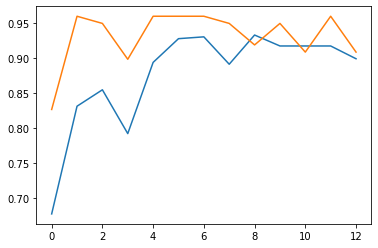

In [ ]:
# 훈련과 테스트 데이터의 정확도를 그래프로 확인
plt.plot(train_acc_hist)
plt.plot(val_acc_hist);

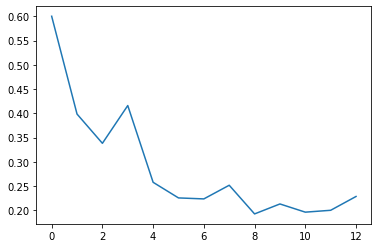

In [ ]:
# 훈련 데이터의 오차에 대한 그래프 확인
plt.plot(train_loss_hist);

In [ ]:
# 예측 이미지 출력을 위한 전처리 함수
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image=image*(np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5)))  
  image = image.clip(0,1)
  return image

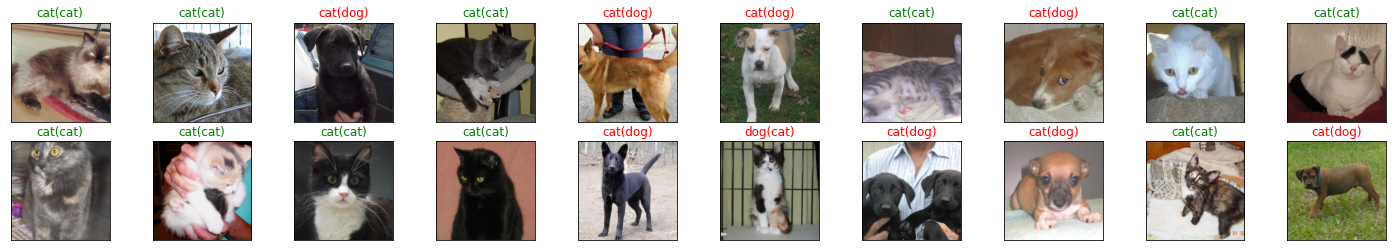

<Figure size 432x288 with 0 Axes>

In [ ]:
# 개와 고양이 예측 결과 출력
classes = {0:'cat',1:'dog'}

dataiter = iter(test_loader)
images, labels = dataiter.next()
output = model(images)
_, preds = torch.max(output,1)

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))  
  a.set_title(classes[labels[i].item()])
  ax.set_title("{}({})".format(str(classes[preds[idx].item()]),str(classes[labels[idx].item()])),color=("green" if preds[idx]==labels[idx] else "red"))

plt.show()
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

## Fine tuning 기법
미세 조정 기법은 특성 추출 기법에서 더 나아가 사전 훈련 모델과 합성곱층, 데이터분류기의 가중치를 업데이트하여 훈련시키는 방식이다. 특성 추출은 목표 특성을 잘 추출했다는 전제하에 좋은 성능을 낼 수 있다. 특성이 잘못 추출되었다면 미세 조정 기법으로 새로운 이미지 데이터를 사용하여 네트워크의 가중치를 업데이트해서 특성을 다시 추출할 수 있다. 즉, 사전 학습된 모델을 목적에 맞게 재학습시키거나 학습된 가중치의 일부를 재학습 시키는 것이다.

미세 조정 기법은 훈련시키려는 데이터셍의 크기와 사전 훈련된 모델에 따라 다음과 같은 전략을 세울 수 있다.

- **데이터셋이 크고 사전 훈련된 모델과 유사성이 작을 경우**: 모델 전체를 재학습시킨다. 데이터 셋의 크기가 크기 때문에 재학습시키는 것은 좋은 전략이다.
- **데이터셋이 크고 사전 훈련된 모델과 유사성이 클 경우**: 합성곱층의 뒷부분(완전연결층과 가까운 부분)과 데이터 분류기를 학습시킨다. 데이터셋이 유사하기 때문에 전체를 학습시키는 것보다는 강한 특징이 나타나는 합성곱층의 뒷부분과 데이터 분류기만 새로 학습하더라도 최적의 성능을 낼 수 있다.
- **데이터셋이 작고 사전 훈련된 모델과 유사성이 작을 경우**: 합성곱층의 일부분과 데이터 분류기를 학습시킨다. 데이터가 적기 때문에 일부 계층에 미세 조정 기법을 적용한다고 해도 효과가 없을 수도 있다. 따라서 합성곱층 중 어디까지 새로 학습시켜야 할지 적당히 설정해주어야 한다.
- **데이터셋이 작고 사전 훈련된 모델과 유사성이 클 경우**: 데이터 분류기만 학습시킨다. 데이터가 적기 때문에 많은 계층에 미세 조정 기법을 적용하면 과적합이 발생할 수 있다. 따라서 최종 데이터 분류기인 완전연결층에 대해서만 미세 조정 기법을 적용한다.

In [ ]:
import os 
import time
import copy
import glob
import cv2
import shutil
from tqdm import notebook

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from google.colab import drive
drive.mount('/content/drive')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

##### 이미지 데이터 전처리 방법 정의 #####
data_path = '/content/drive/MyDrive/딥러닝 파이토치 교과서/train'

transform = transforms.Compose(
    [
     transforms.Resize([256, 256]),      # 이미지의 크기를 조정, 즉 256 x 256 크기로 이미지 데이터를 조정
     transforms.RandomResizedCrop(224),  # 이미지를 랜덤한 크기 및 비율로 자름 (데이터 확장 용도)
     transforms.RandomHorizontalFlip(),  # 이미지를 랜덤하게 수평으로 뒤집는다.
     transforms.ToTensor()
    ])

train_dataset = torchvision.datasets.ImageFolder( # 데이터로더가 데이터를 불러올 대상과 방법을 정의
    data_path,
    transform=transform
)
train_loader = DataLoader(    # 한번에 불러올 데이터 양을 결정
    train_dataset,
    batch_size=32,   # 한번에 불러올 데이터 양을 결정
    num_workers=4,   # 데이터를 불러올 때 하위 프로세스를 몇개 사용할지 설정
    shuffle=True
)

##### 사전 훈련된 모델 내려받기 #####
resnet18 = models.resnet18(pretrained=True)

##### 사전 훈련된 모델의 파라미터 학습 유무 지정 #####
def set_parameter_requires_grad(model, feature_extracting=True):
  if feature_extracting:
    for param in model.parameters():
      param.requires_grad = False

set_parameter_requires_grad(resnet18)

##### ResNet에 완전연결층 추가 #####
resnet18.fc = nn.Linear(512, 2)

##### 모델 객체 생성 및 손실 함수 정의 #####
model = models.resnet18(pretrained=True)  # 모델의 객체 생성

for param in model.parameters():      # 모델의 합성곱층 가중치는 고정
  param.requires_grad=True

model.fc = torch.nn.Linear(512, 2)    # 완전연결층은 학습
for param in model.fc.parameters():
  param.requires_grad=True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss()  # 손실함수 정의

##### 모델 학습을 위한 함수 생성 #####
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):
  since = time.time()
  acc_history = []
  loss_history = []
  best_acc = 0.0

  for epoch in notebook.tqdm(range(num_epochs)):    # 에포크(13)만큼 반복
    print('Epoch {}/{}'.format(epoch, num_epochs-1))
    print('-'*10)

    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in dataloaders:    # 데이터로더에 전달된 데이터만큼 반복
      inputs = inputs.to(device)
      labels = labels.to(device)

      model.to(device)
      optimizer.zero_grad()               # 기울기를 0으로 설정
      outputs = model(inputs)             # 순전파 학습
      loss = criterion(outputs, labels)
      _, preds = torch.max(outputs, 1)
      loss.backward()                     # 역전파 학습
      optimizer.step()

      running_loss += loss.item() * inputs.size(0)          # 출력 결과와 레이블의 오차를 계산한 결과를 누적하여 저장
      running_corrects += torch.sum(preds == labels.data)   # 출력 결과와 레이블이 동일한지 확인한 결과를 누적하여 저장

    epoch_loss = running_loss / len(dataloaders.dataset)
    epoch_acc = running_corrects.double() / len(dataloaders.dataset)

    print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

    if epoch_acc > best_acc:
      best_acc = epoch_acc

    acc_history.append(epoch_acc.item())
    loss_history.append(epoch_loss)
    torch.save(model.state_dict(), os.path.join('/content/sample_data/', '{0:0=2d}.pth'.format(epoch)))  # 모델 재사용을 위해 저장
    # model.state_dict() 모델이 그동안 학습했던 가중치와 편향값들이 저장되어 있는 객체
    print()

  time_elapsed = time.time()
  print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed//60, time_elapsed % 60))
  print('Best Acc: {:.4f}'.format(best_acc))
  return acc_history, loss_history

##### 파라미터 학습 결과를 옵티마이저에 전달 #####
params_to_update = []
for name, param in resnet18.named_parameters():
  if param.requires_grad == True:
    params_to_update.append(param)        # 파라미터 학습 결과를 저장

optimizer = optim.Adam(params_to_update)  # 학습 결과를 옵티마이저에 전달

##### 모델 학습 #####
criterion = nn.CrossEntropyLoss()
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

##### 테스트 데이터 호출 및 전처리 #####
test_path = '/content/drive/MyDrive/딥러닝 파이토치 교과서/test'

transform = transforms.Compose(
    [
     transforms.Resize(224),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
    ])

test_dataset = torchvision.datasets.ImageFolder(
     root=test_path,
     transform=transform
    )

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    num_workers=1,
    shuffle=True
)
print(len(test_dataset))

##### 테스트 데이터 평가 함수 생성 #####
def eval_model(model, dataloaders, device):
  print('----- Test Start -----')
  since = time.time()
  acc_history = []
  best_acc = 0.0

  saved_models = glob.glob('/content/sample_data/'+'*.pth')
  saved_models.sort()
  print('svaed_model', saved_models)

  for model_path in saved_models:
    print('Loading model', model_path)

    model.load_state_dict(torch.load(model_path))
    model.eval()
    model.to(device)
    running_corrects = 0

    for inputs, labels in dataloaders:  # 테스트 반복
      inputs = inputs.to(device)
      labels = labels.to(device)

      with torch.no_grad():            # 평가할 때는 autograd를 사용하지 않겠다.
        outputs = model(inputs)        # 데이터를 모델에 적용한 결과를 outputs에 저장

      _, preds = torch.max(outputs.data, 1)
      preds[preds >= 0.5] = 1  # torch.max로 출력된 값이 0.5보다 크면 올바르게 예측
      preds[preds < 0.5] = 0   # torch.max로 출력된 값이 0.5보다 작으면 틀리게 예측
      running_corrects += preds.eq(labels).int().sum() 
      # preds.eq(labels)는 preds 배열과 labels 일치하는지 검사하는 용도
      # sum()을 통해 예측 결과와 정답(레이블)이 일치하는 것들의 개수 합을 숫자로 출력

    epoch_acc = running_corrects.double() / len(dataloaders.dataset)
    print('Acc: {:.4f}'.format(epoch_acc))

    if epoch_acc > best_acc:
      best_acc = epoch_acc
      acc_history.append(epoch_acc.item())
      print()

  time_elapsed = time.time() - since
  print('Validation complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
  print('Best Acc: {:4f}'.format(best_acc))
  
  return acc_history

val_acc_hist = eval_model(resnet18, test_loader, device)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch 0/12
----------
Loss: 0.5522 Acc: 0.7403

Epoch 1/12
----------
Loss: 0.3370 Acc: 0.8779

Epoch 2/12
----------
Loss: 0.3088 Acc: 0.8390

Epoch 3/12
----------
Loss: 0.2991 Acc: 0.8727

Epoch 4/12
----------
Loss: 0.2125 Acc: 0.9169

Epoch 5/12
----------
Loss: 0.2342 Acc: 0.9065

Epoch 6/12
----------
Loss: 0.2424 Acc: 0.8961

Epoch 7/12
----------
Loss: 0.1800 Acc: 0.9377

Epoch 8/12
----------
Loss: 0.2338 Acc: 0.8883

Epoch 9/12
----------
Loss: 0.1846 Acc: 0.9351

Epoch 10/12
----------
Loss: 0.1723 Acc: 0.9273

Epoch 11/12
----------
Loss: 0.2253 Acc: 0.8961

Epoch 12/12
----------
Loss: 0.1668 Acc: 0.9403

Training complete in 27506370m 35s
Best Acc: 0.9403
98
----- Test Start -----
svaed_model ['/content/sample_data/00.pth', '/content/sample_data/01.pth', '/content/sample_data/02.pth', '/content/sample_data/03.pth', '/content/sample_data/04.pth', '/content/sample_data/05.pth', '/content/sample_data/06.pth', '/content/sample_data/07.pth', '/content/sample_data/08.pth', '/c